<div style="border:solid Purple 2px; padding: 40px">

<b>Привет, Станислав!👋

Меня зовут Эльвира, я буду ревьюером твоего проекта. Предлагаю общаться на «ты», но если это не удобно - дай мне знать, и мы перейдем на «вы».


Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:


<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Такими комментариями я буду помечать отлично проделаную работу😉
</div>
    
<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
        
В таких комментариях я постараюсь подсказать тебе более элегантное или легкое решение, некоторые хитрости и фишки. Части проекта, помеченные такими комментариями, можно не исправлять, но рекомендую обратить на них внимание.</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>
    
В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Если ты видишь такой комментарий, значит здесть есть недочет, который следует исправить.
</div>

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница🙃
    
`<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>`

Чтобы сделать подобный блок, кликни здесь дважды и скопируй всю предыдущую строку ;)
    
Пожалуйста, не удаляй и не перемещай мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта.</div></b>

# Исследование данных о продажах игр и выявление закономерностей определяющих успешность игр

## Общее описание проекта

* Исследовательский проект, направленный на прогнозирование популярности игр в следующем году по данным прошлых лет. Для этого необходимо найти закономерности и основные параметры определяющие успешность игр. 
* Даны исторические данные до 2016 года о продажах игр, оценке пользователей и экспертов, жанры и платформы. Планируется кампания на 2017-й.
* Выявить определяющие успешность игр закономерности, чтобы появилась возможность сделать ставку на потенциально популярный продукт и спланировать рекламные компании.

### План

1. Открыть файл и изучить общую информацию
2. Предобработка данных:
    1) заменить названия столбцов
    2) преобразовать данные в нужные типы
    3) обработать пропуски
    4) подсчитать суммарные продажи и записать их в новый столбец
3. Исследовательский анализ данных:
    1) проанализировать важность периодов по годам
    2) исследовать изнение продаж по платформам
    3) проанализировать рост и падение продаж платформ за актуальный период
    4) построить графики по глобальным продажам игр в разбивке по платформам
    5) оценить влияние отзывов пользователей и критиков на продажы внутри одной популярной платформы
    6) посмотреть общее распределение игр по жанрам
4. Составить портрет пользователя каждого региона:
    1) составить топ-5 платформ для каждого региона
    2) составить топ-5 жанров для каждого региона
    3) оценить влияние ESRB на продажы в отдельном регионе
5. Проверка гипотез:
    1) средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    2) средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
6. Сформулировать общий вывод

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>

Введение, как и общий вывод - важные части твоей работы, на которые в первую очередь обращает внимание заказчик. Давай добавим следующие пункты:
* заголовок,

* краткое описание проекта,

* выделим цель проекта

* описание данных

* краткий план работы, выделим основные этапы, которые должны сделать. (это у нас есть)

Тогда получатель отчета сможет быстрей его понять.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Молодец, что загружаешь все библиотеки в начале проекта. Так сложней случайно удалить ячейку с загрузкой нужной библиотеки и сделать код не работающим. А получатель отчета сразу поймет, какие библиотеки ты используешь и какие ему нужно установить для запуска проекта.

</div>

## Загрузка данных

In [2]:
try:
    data = pd.read_csv('../datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Удобнее смотреть на процент пропусков по колонкам, это можно сделать,  например, так:
    
`data.isnull().sum()*100/len(data)`

Более продвинутый вариант (кол-во пропусков + процент пропусков)
    
`report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)`
    
Это полезное действие при подборе стратегии заполнения пропусков: обычно, если в данных кол-во пропусков превышает 10%, восполнение пропусков результатами выполнения стандартных операций типа расчета среднего/медианы по столбцу, может привести к искажению данных. Если мы сталкиваемся с такой ситуацией, то важно подумать и подобрать более сложную восполнения пропусков в данных.

In [5]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Вывод по разделу

В данных замечены пропуски в колонках name, year_of_realease, genre, critic_score, user_score, rating. Также стоит изменить типы данных в колонках Year_of_Release и User_Score на int и float соответсвтенно и изменить названия колонок (привести к нижнему регистру)

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Здорово, что есть промежуточный вывод)

## Предобработка данных

### Изменение названий колонок

In [6]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>

Чтобы изменить регист также можно использовать `str.lower()`

### Изменение типов колонок

Изменил тип Year_of_Release на int для оптимизации по памяти. (int выбрал потому, что в колонке нет информации о месяце и дне релиза и значит перевод в datetime не принесет пользы)

In [7]:
data['year_of_release'] = data['year_of_release'].astype('Int16')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int16  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int16(1), float64(5), object(5)
memory usage: 1.3+ MB


Значения tbd в колонке user_score обозначают пропуски как и NaN. Сначала заменим tbd на NaN и изменим тип на float. 

In [8]:
data['user_score'] = data['user_score'].replace({'tbd': None})
data['user_score'].value_counts()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
0.9      2
1.3      2
0.5      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [9]:
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int16  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int16(1), float64(6), object(4)
memory usage: 1.3+ MB


* Типы в колонках year_of_release и user_score были изменены. 
* значения tbd в колонке user_store изменены на NaN

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Типы скорректированы верно)

### Обработка пропусков

#### year_of_release

In [10]:
data['year_of_release'].isna().sum()

269

year_of_release имеет 269 пропусков. Заполнение пропусков какой-нибудь метрикой "размажет" данные, также пропуски не скажутся на результатах исследования, поэтому эти пропуски оставляем.

#### genre, name

In [11]:
data['genre'].isna().sum()

2

In [12]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти строки содержат мало информации и их можно стереть без влияния на качество исследования.

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>

Но еси рассмотреть и другие значения, можно увидеть, что в этих двух строках очень мало данных, в целом можно их удалить)

In [13]:
data = data.dropna(subset=['name', 'genre'])
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Удалены строки с пропусщенными именами и жанрами

#### Заполнение пропусков в оценке

Данные в этих колонках могут сильно повлиять на исследование и имеют до половины всей колонки пропусков, но заполнить эти пропуски какими-либо значениями, не повлияв на итоги исследования, тяжело, поэтому эти пропуски придется оставить.

In [14]:
display(data['critic_score'].isna().sum())
display(data['user_score'].isna().sum())

8576

9123

### Заполнение пропусков в возрастном рейтинге

In [15]:
data['rating'].isna().sum()

6764

В этой колонке пропуски можно заполнить уже имеющимся в данных значением RP(рейтинг ожидается), которое само по себе является заглушкой.

In [16]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
data['rating'] = data['rating'].fillna('RP')

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Хорошо)

### Обработка дубликатов

Явных дудликатов не найдено

In [18]:
data.duplicated().sum()

0

В колонке 'platform' неявных дубликатов не найдено. 

In [19]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [20]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [21]:
data.loc[:, ['name', 'platform', 'year_of_release', 'genre']].duplicated().sum()

1

In [22]:
data[data.loc[:, ['name', 'platform', 'year_of_release', 'genre']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [23]:
data = data.drop(16230, axis=0).reset_index(drop=True)

Удалена дублирующаяся строка

### Суммарные продажи

Создан столбец с суммой продаж по всем регионам

In [24]:
data['sum_sales'] = data['eu_sales'] + data['jp_sales'] + data['na_sales'] + data['other_sales']

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>
    
Важно учесть продажи в другим регионах в общей сумме. Давай добавим)

### Вывод по разделу

* Названия колонок приведены к нижнему регистру.
* В колонках user_score и year_of_release были изменены на float и int.
* В колонках genre, name пропуски удалены.
* В колонке rating пропуски были заполнены значением-заглушкой RP.
* Найдены и обработаны дубликаты
* Добавлена колонка с суммой продаж по всем регионам.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>
    
Мы пропустили один важный шаг предобработки - проверка на дубликаты, давай добавим  проверку на явные и неявные дубликаты.

Поскольку в данных часто встречаются разного рода ошибки, полученные, например, при сборе из разных БД, использовании внешних данных, техническом сбое при логгировании. Поэтому следует сделать более тщательную проверку, сравнив данные по нескольких столбцам используя дополнительный параметр subset())

## Исследовательский анализ

### Сколько игр выпускались в разные годы

In [25]:
data.groupby('year_of_release')['name'].agg('count').sort_values()

year_of_release
1980       9
1984      14
1985      14
1988      15
1990      16
1987      16
1989      17
1983      17
1986      21
1982      36
1991      41
1992      43
1981      46
1993      60
1994     121
1995     219
1996     263
1997     289
1999     338
2000     350
1998     379
2001     482
2016     502
2013     544
2014     581
2015     606
2012     652
2004     762
2003     775
2002     829
2005     939
2006    1006
2011    1136
2007    1197
2010    1255
2009    1426
2008    1427
Name: name, dtype: int64

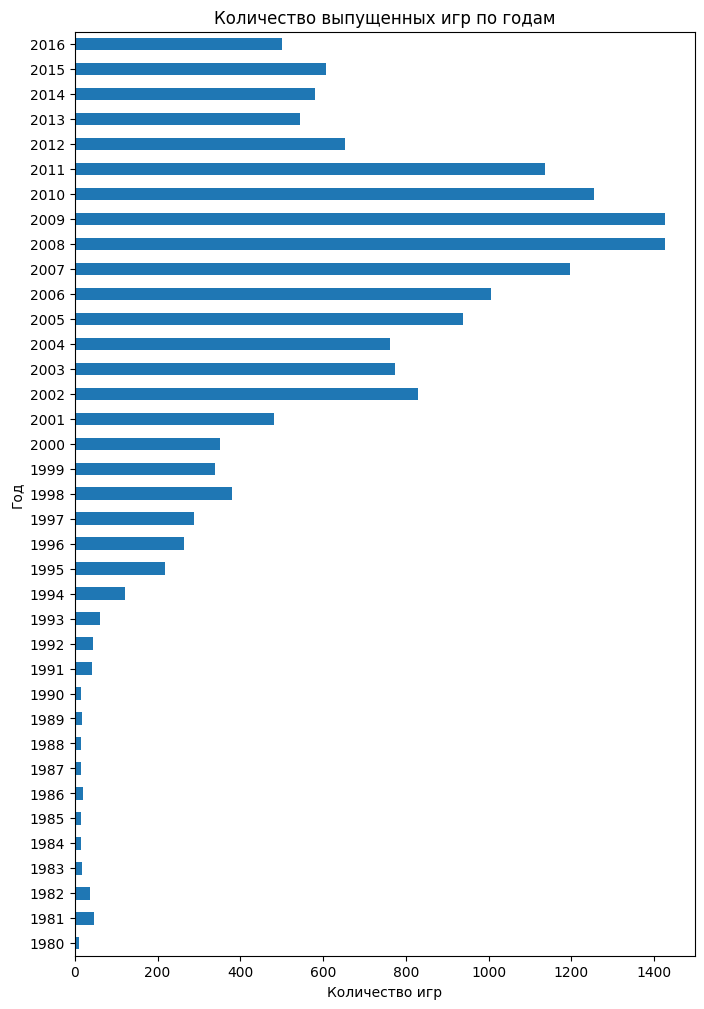

In [26]:
data.groupby('year_of_release')['name'].agg('count').plot(kind='barh', figsize=(8,12), title='Количество выпущенных игр по годам')
plt.xlabel('Количество игр')
plt.ylabel('Год');

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>

При построении распределений по годам сортировка нужна по дате, а не кол-ву.

Для того что убрать технические подписи(<AxesSubplot:), ты можешь использовать `plt.show()` или `;`. Так же можно добавить подписи к графику, используя `plt.xlabel()` и `plt.ylabel()`, `plt.title()`. Подробнее об оформлении графиков, ты можешь узнать тут:
    
https://slemeshevsky.github.io/python-course/visual/html/._visual-flatly002.html

Подавляющее большенство игр было выпущено после 2001 года. По графику также видно, что пик количества выпущенных игр пришелся на 2007-2011 года, а с 2012 по 2016 наблюдается спад.

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>

Очень краткий вывод по графику, будет хорошо дополнить)

### Продажи по платформам 

Платформы с наибольшими суммарными продажами

In [27]:
platforms = data.groupby('platform')['sum_sales'].agg('sum').sort_values(ascending=False)[:10]
platforms

platform
PS2     1255.77
X360     971.42
PS3      939.64
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: sum_sales, dtype: float64

Распределение продаж по годам у самых популярных платформ

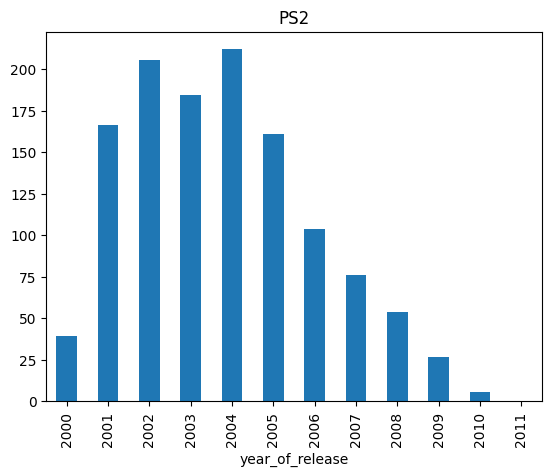

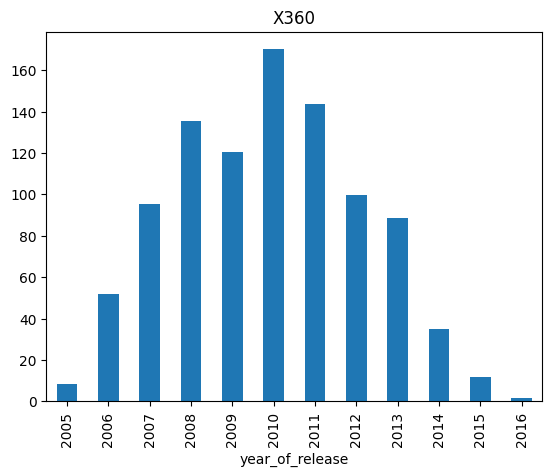

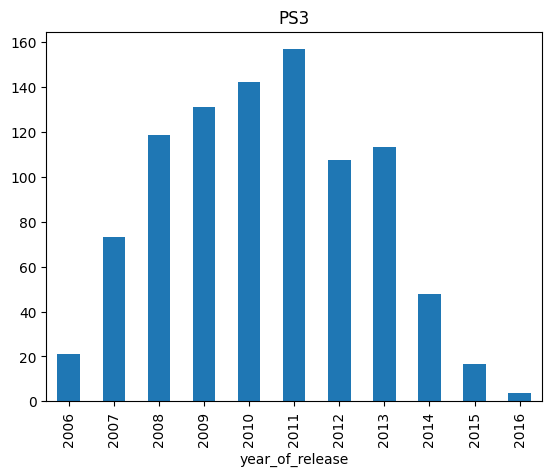

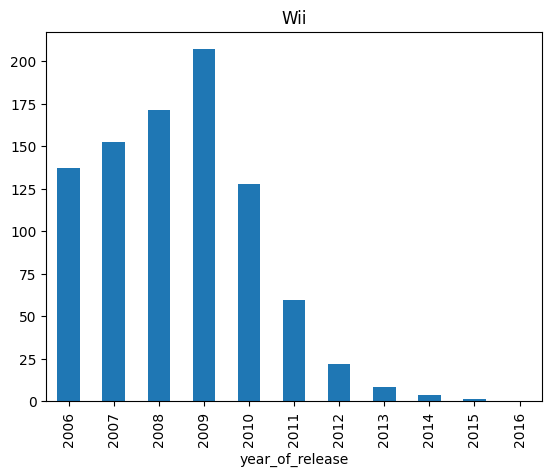

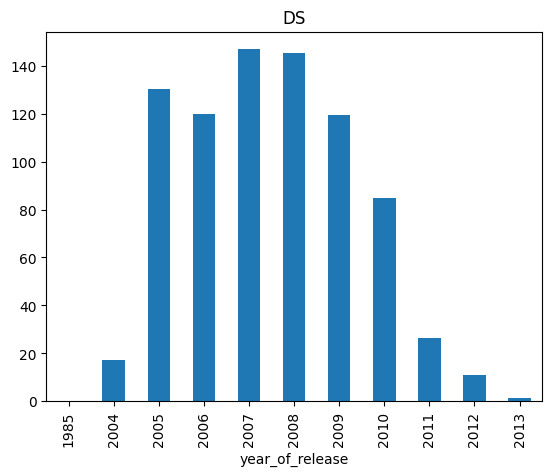

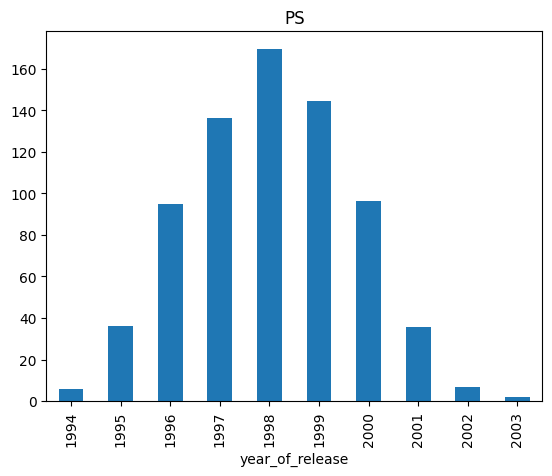

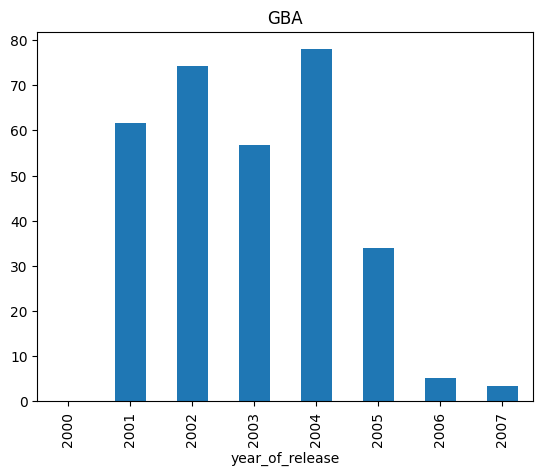

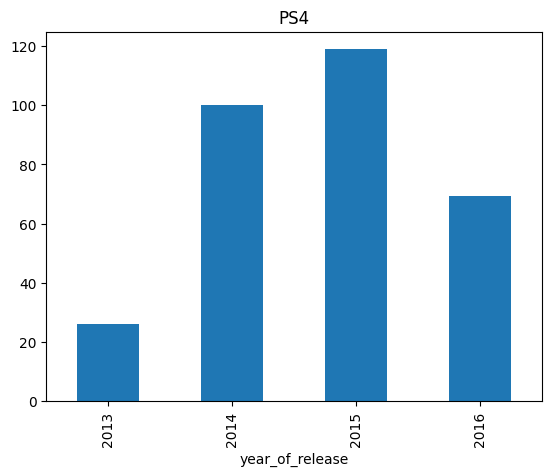

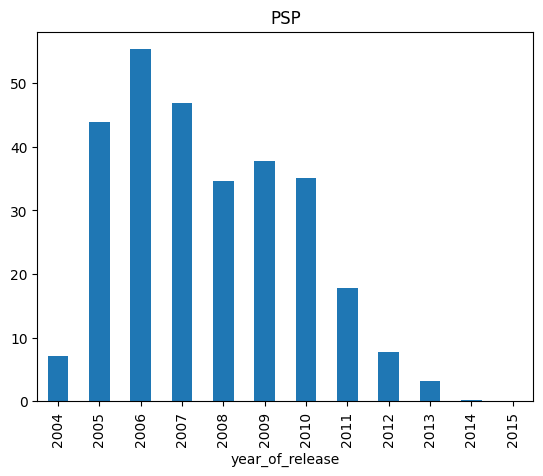

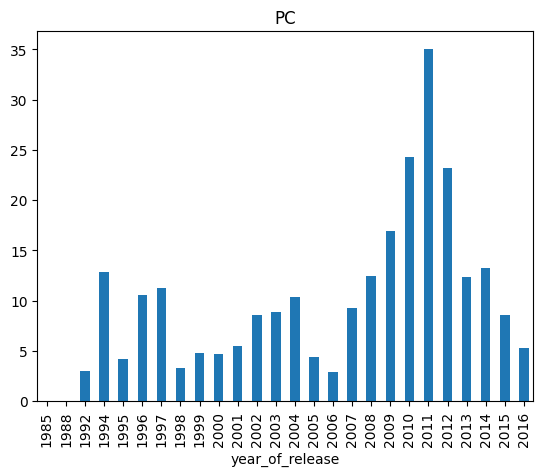

In [28]:
for t in platforms.index:
    data[data['platform'] == t].groupby('year_of_release')['sum_sales'].agg('sum').plot(kind='bar', title=t);
    plt.show()

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>

Нужно убрать display(), в нем нет необходимости при построении графика)
    
Обрати внимание на платформу DS, нет ли ошибок в данных)?

По графикам можно сказать что платформы обычно "живут" примерно 10 лет, значит будем считать актуальным период в последнее десятилетие.
На графике распределения продаж по годам у платформы DS пожно заметить аномалию: имеются продажи за 1985 год.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Жизненный цикл определен верно, молодец)

### Прогноз на 2017 год

Возмем данные за последние 5 лет (приемрно 10 лет составляет жизненный цикл платформы, а за 5 лет можно увидеть будет платформа расти или уже идет на спад, также мы не захватим неактуальные данные) и построим прогноз на 2017 год.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>

На данном шаге очень важно выбрать актуальный период, причем как можно более ранний, поскольку резкий спад популярности платформы может произойти за 3-4 года. Если мы посмотрим на продажи игр по отдельности, как на графике ранее, мы можем увидеть,  что лидером по продажам за всю историю PS2. Но продажи к 2011 году уже нулевые. X360 был на пике в 2010, но к 2016 упал почти до 0. Та же ситуация с PS3: к 2016 г. продажи стремятся к нулю, у Wii продажи нулевые уже в 2015 г.  Соответственно, если мы выбираем более длинный период, мы рискуем захватить отстающий тренд, т.е. включаем в данные неактуальные платформы предпериода, которые не должны оставаться в данных для предсказываемом периоде. 

In [29]:
relevant_data = data[data['year_of_release'] >= 2011]

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>

А для чего мы фильтруем по 2016 году?)

In [30]:
relevant_data.groupby('platform')['sum_sales'].agg('sum').sort_values(ascending=False)

platform
PS3     445.56
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
PC       97.68
Wii      95.02
WiiU     82.19
PSV      53.81
DS       38.73
PSP      29.01
PS2       0.45
Name: sum_sales, dtype: float64

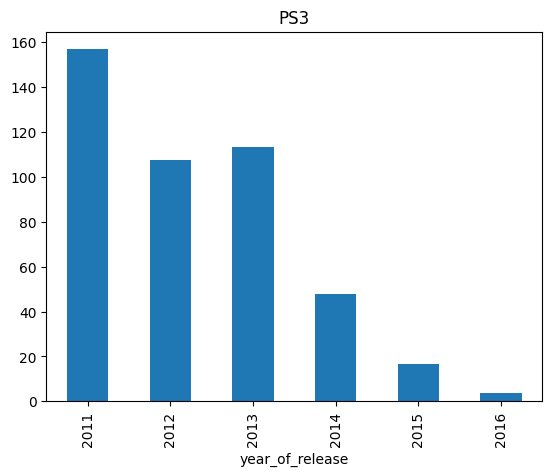

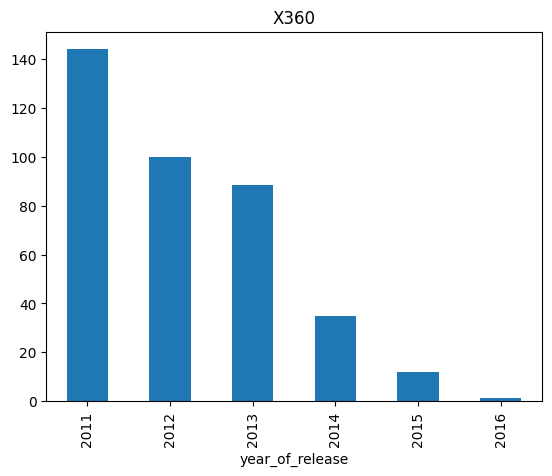

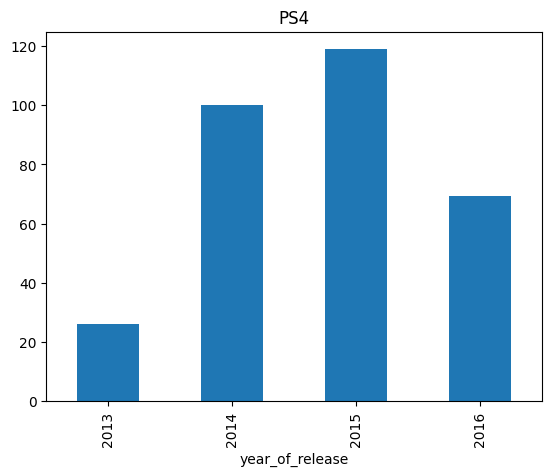

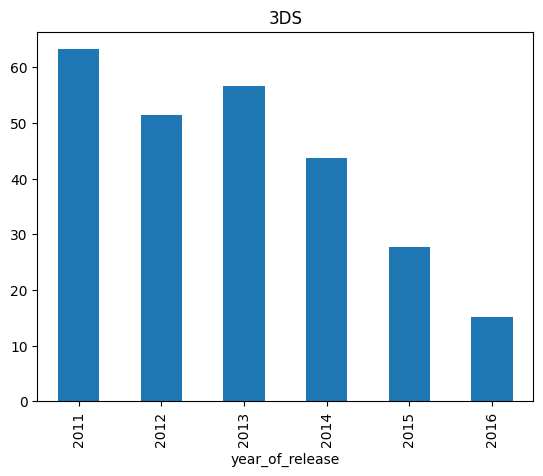

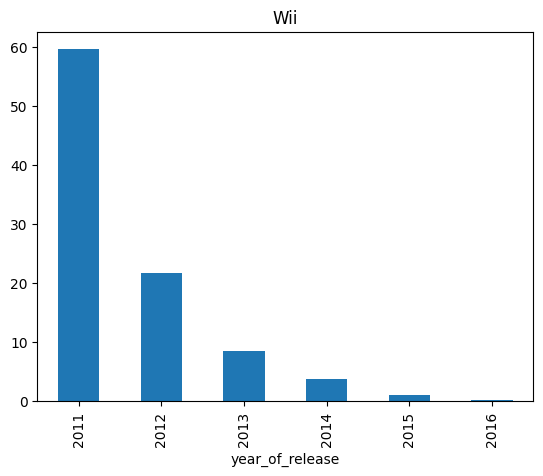

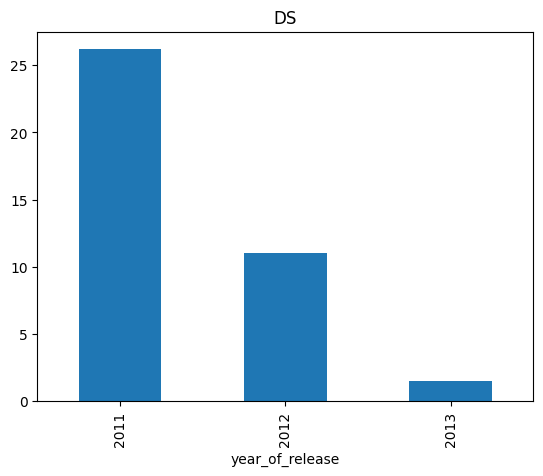

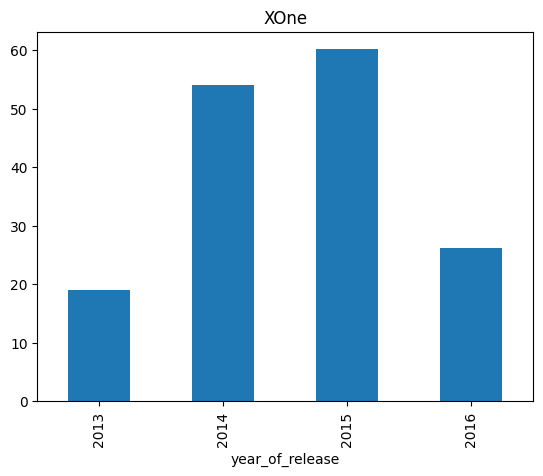

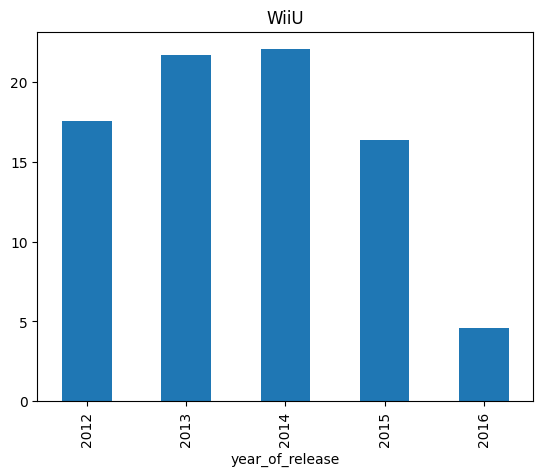

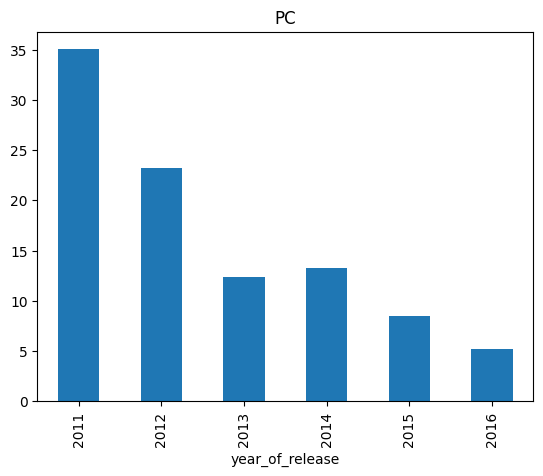

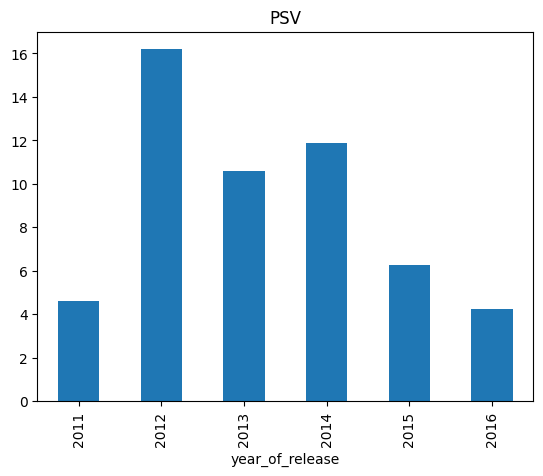

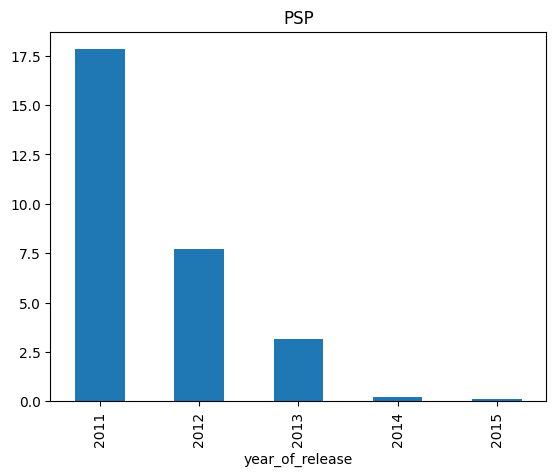

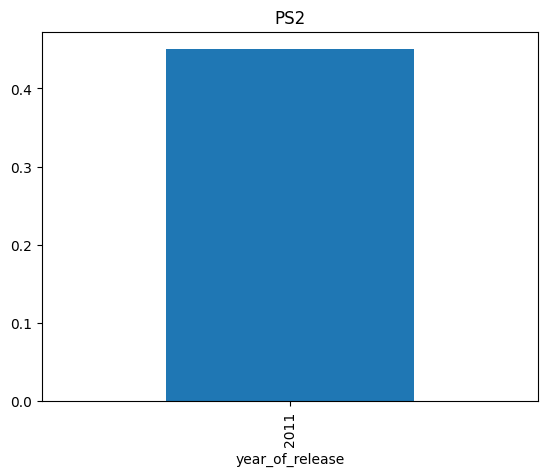

In [31]:
for t in relevant_data['platform'].unique():
    relevant_data[relevant_data['platform'] == t].groupby('year_of_release')['sum_sales'].agg('sum').plot(kind='bar', title=t);
    plt.show()

In [32]:
relevant_data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'Wii', 'DS', 'XOne', 'WiiU', 'PC',
       'PSV', 'PSP', 'PS2'], dtype=object)

* Платформы X360, Wii, PS3, DS, PSP и PC падают по продажам начиная с начала периода до 2016 года.
* В этом периоде себя хорошо показывают платформы: PSV, WiiU, XOne, PS4, 3DS 
* К концу периода у всех платформ наблюдается спад продаж (это обусловленно общим трендом на уменьшение суммы продаж в игровой индестрии, поэтому следует также исследовать медианные значения продаж по платформам)

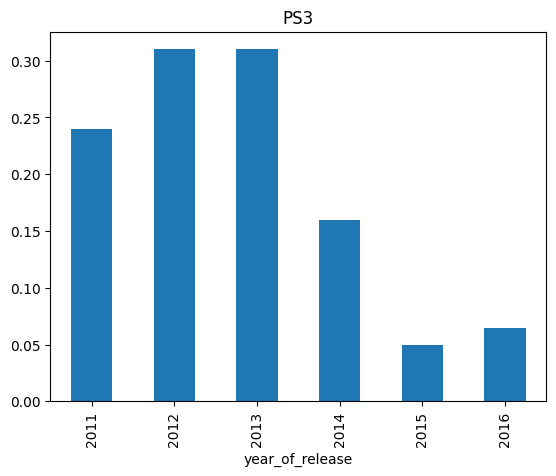

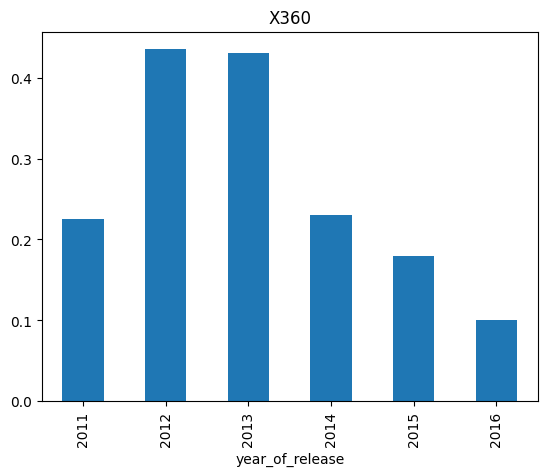

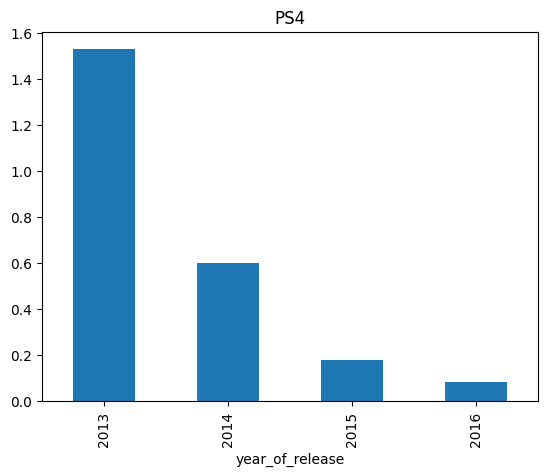

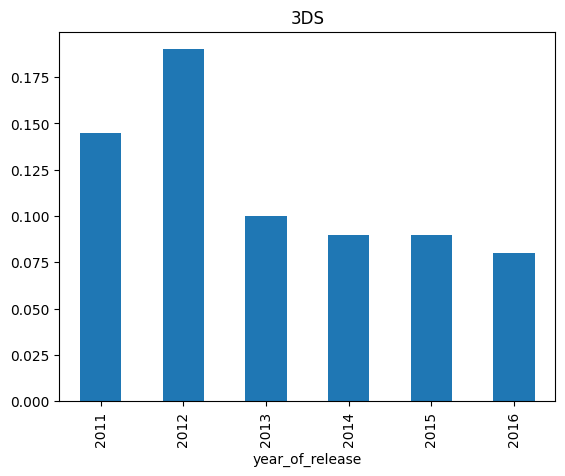

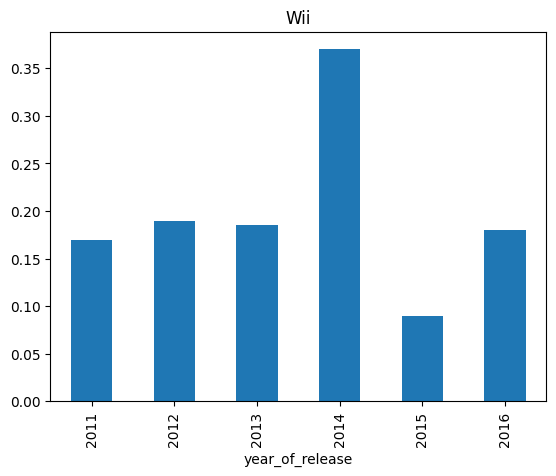

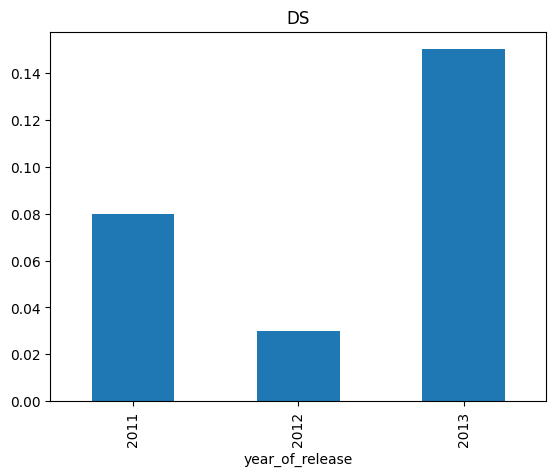

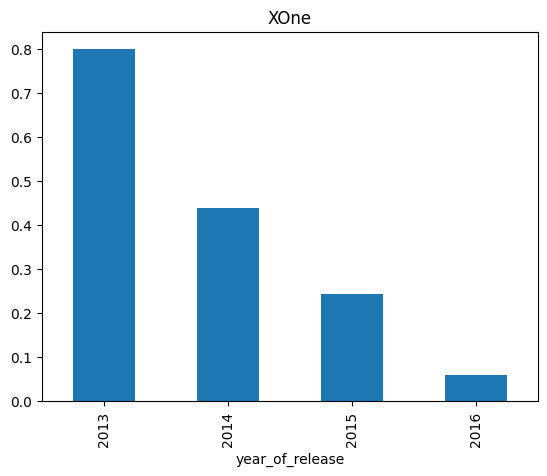

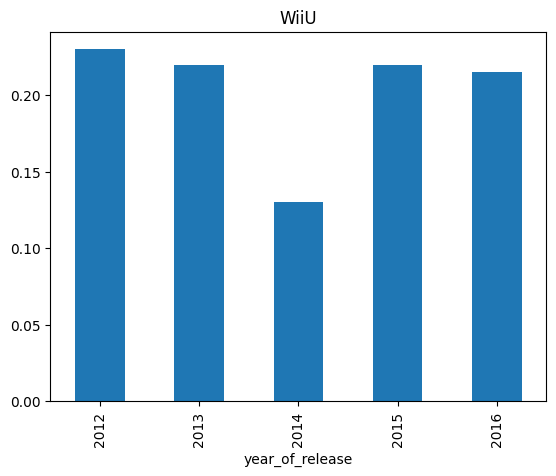

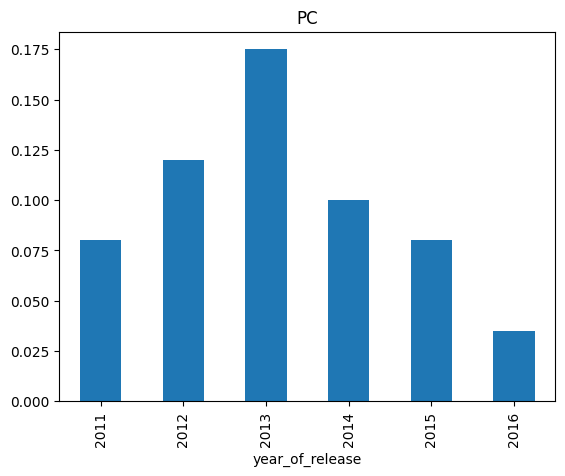

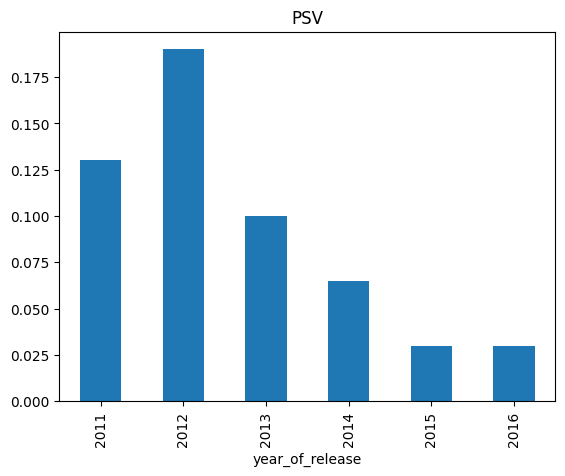

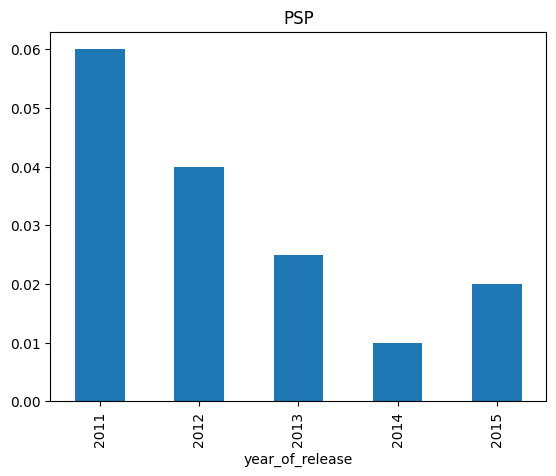

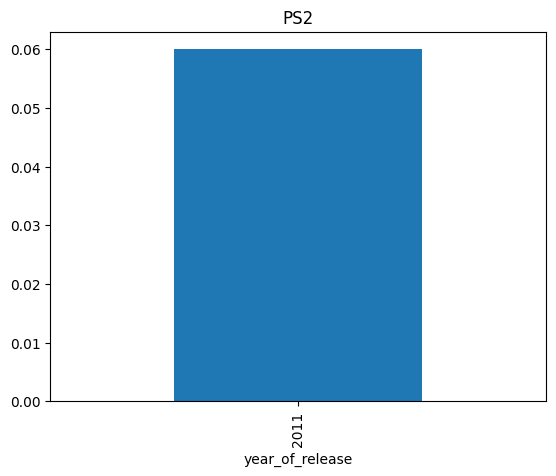

In [33]:
for t in relevant_data['platform'].unique():
    relevant_data[relevant_data['platform'] == t].groupby('year_of_release')['sum_sales'].agg('median').plot(kind='bar', title=t);
    plt.show()

* Смотря на медианные значения продаж по платформам стоит выделить WiiU, Wii, 3DS как более стабильные платформы, медианы прибыли которых не начали падать.
* PC, PSV, X360 также хорошо себя показывают на этом промежутке, однако их продажи уже начали падать.
* Отдельно стоит сказать про PS4 и XOne, на которые до исследования медиан хотелось сделать оставку, однако они показывают резкий спад в этом периоде и врядли будут прибыльны в следующем году.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>

Не забудь обновить выводы, также не будем забывать, что данные за 2016 год неполные, поэтому будет просадка на графике)

### Диаграмма размаха по продажам игр в разбивке по платформам

#### Подробно все графики по отдельности 

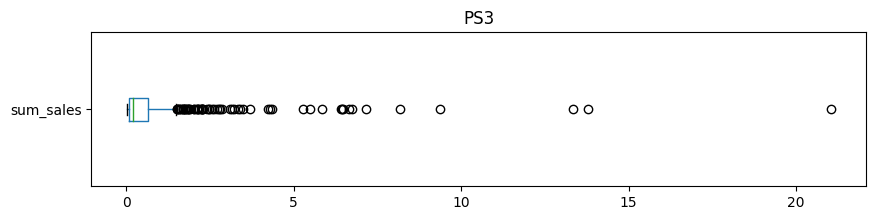

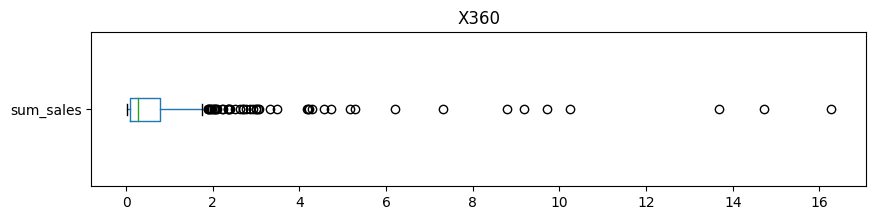

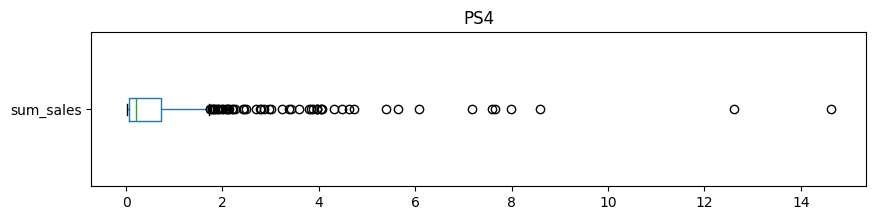

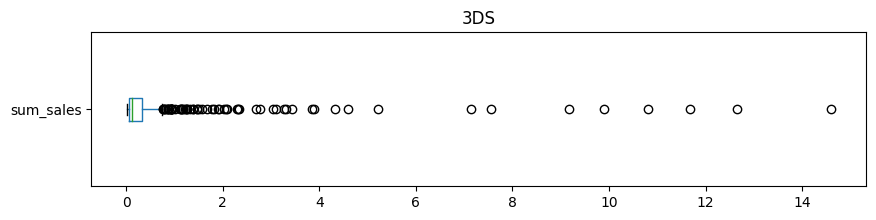

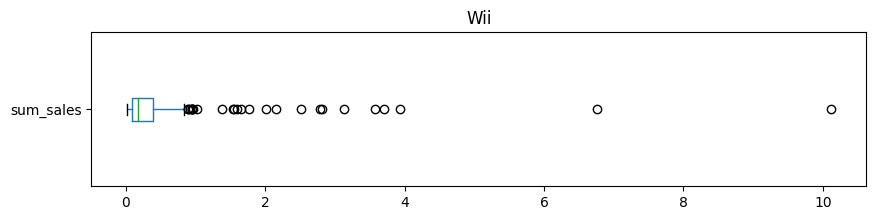

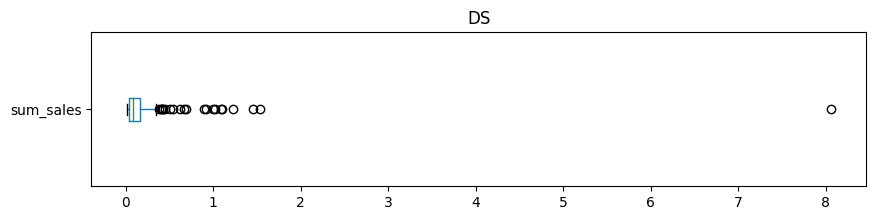

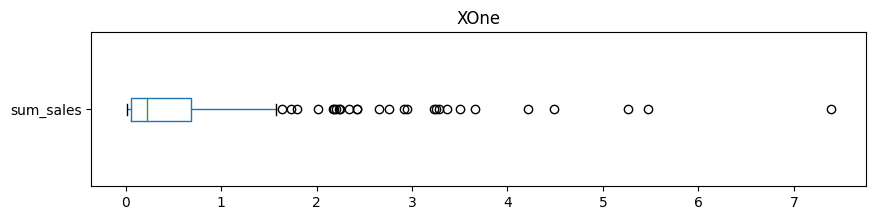

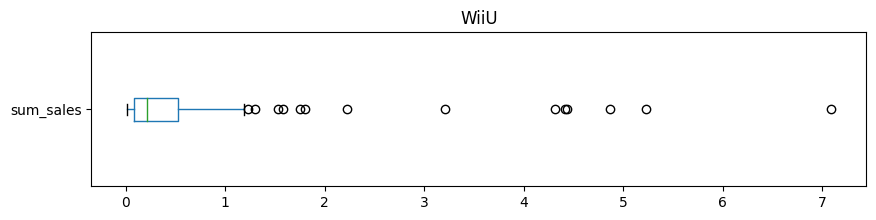

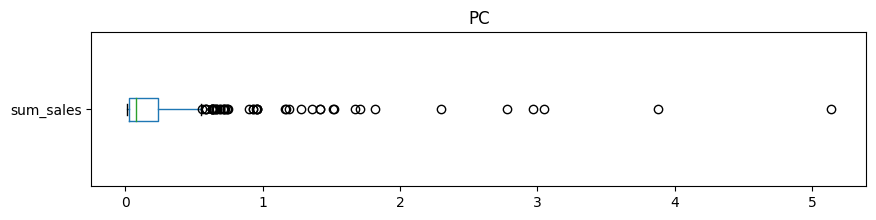

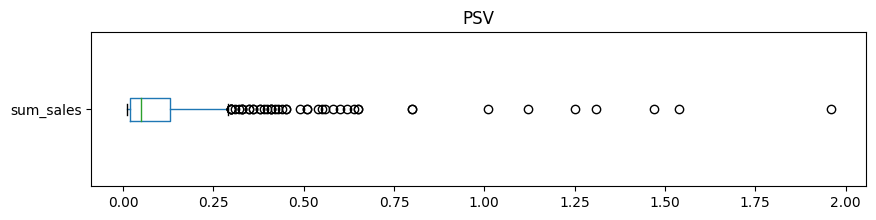

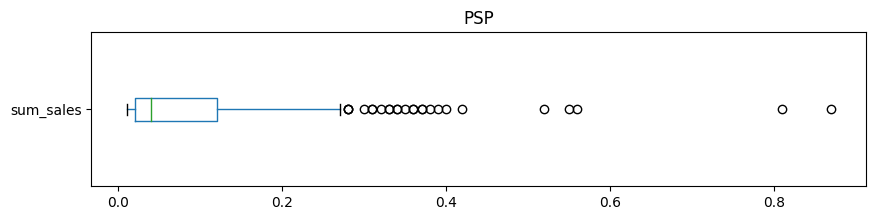

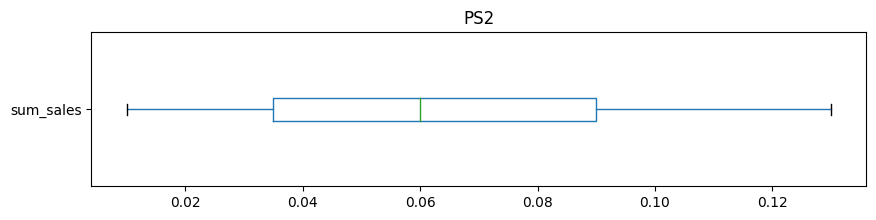

In [34]:
for t in relevant_data['platform'].unique():
    relevant_data[relevant_data['platform'] == t].plot(y='sum_sales', vert=False, figsize=(10,2), kind='box').set_title(t)
    plt.show()

#### Все платформы на одном графике

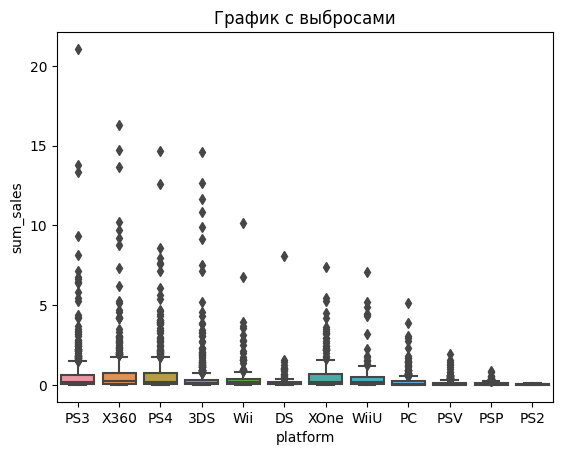

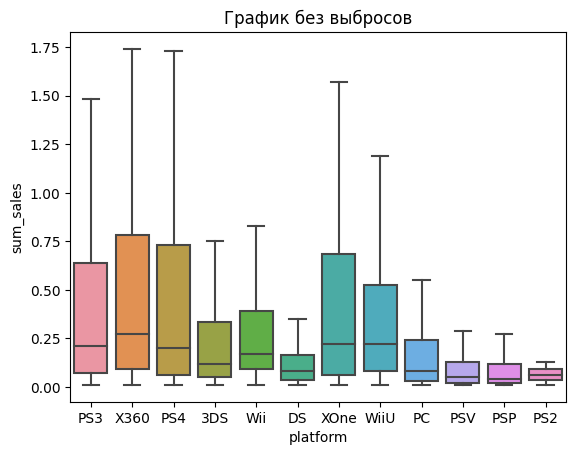

In [35]:
sns.boxplot(y='sum_sales', x='platform', data=relevant_data).set_title('График с выбросами');
plt.show()
sns.boxplot(y='sum_sales', x='platform', data=relevant_data, showfliers=False).set_title('График без выбросов');

* Обычно общие продажи игр ограничиваются 0.8 миллионом копий, значения выше 1.75 млн. на графиках отмечены как выбросы (скорее всего это единицы хорошо выстрелевших игр).
* Из всех платформ выделяются по прибыли PS3, X360, PS4, XOne, WiiU.
* Остальные платформы за период от 2011г. обычно имеют до 0.4 млн продаж.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>
    
1. Нужно будет отобразить все боксплоты на одном графике
2. Нам также важно изучить медиану и квантили на графике(в выводе), поэтому следует построить два: один с выбросами, а другой без них)



### Влияние отзывов на самой популярной платформе

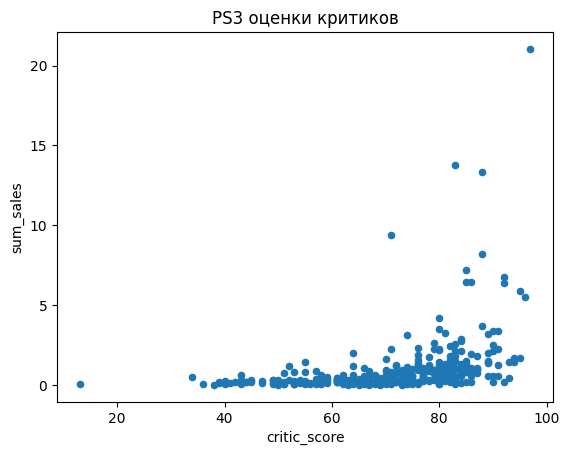

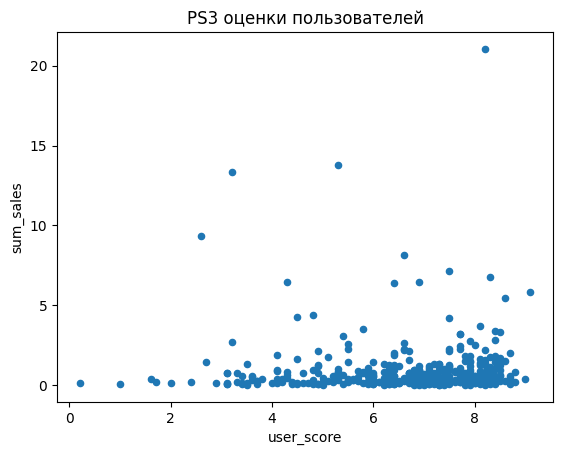

In [36]:
relevant_data[relevant_data['platform'] == 'PS3'].plot(y='sum_sales', x='critic_score', kind='scatter', title='PS3 оценки критиков')
plt.show()
relevant_data[relevant_data['platform'] == 'PS3'].plot(y='sum_sales', x='user_score', kind='scatter', title='PS3 оценки пользователей')
plt.show()

In [37]:
display(relevant_data[relevant_data['platform'] == 'PS3']['sum_sales'].corr(relevant_data[relevant_data['platform'] == 'PS3']['critic_score']))
print('Корреляция продаж и оцекон критиков')
display(relevant_data[relevant_data['platform'] == 'PS3']['sum_sales'].corr(relevant_data[relevant_data['platform'] == 'PS3']['user_score']))
print('Корреляция продаж и оцекон пользователей')

0.3819914330743236

Корреляция продаж и оцекон критиков


0.013221499477217945

Корреляция продаж и оцекон пользователей


Графики и коэффикиент корреляции говорят о том, что отзывы пользователей почти не влияют на продажи, а отзывы критиков имеют некоторое влияние.

### Влияние отзывов на  других платформах

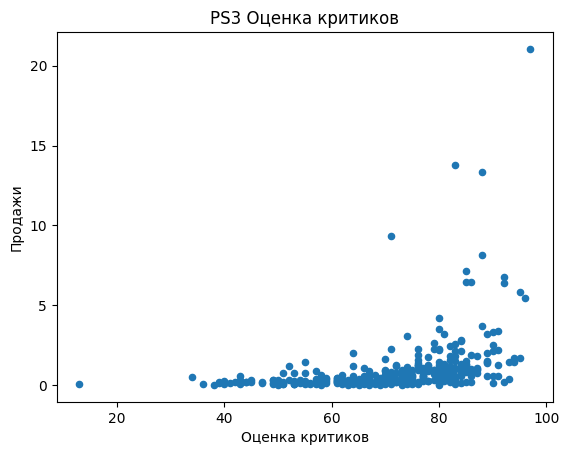

Корреляция оценок критиков и продаж


0.3819914330743236

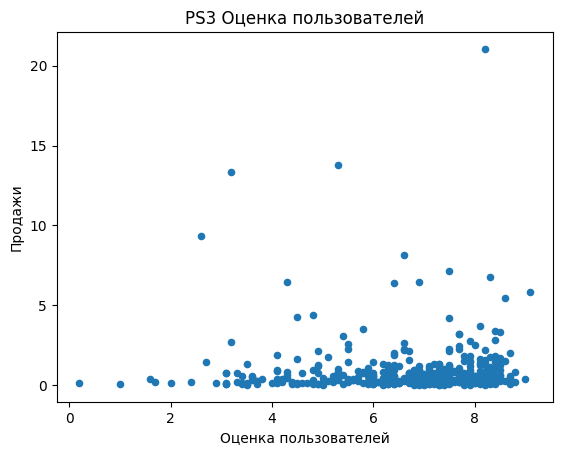

0.013221499477217945

Корреляция оценок пользователей и продаж


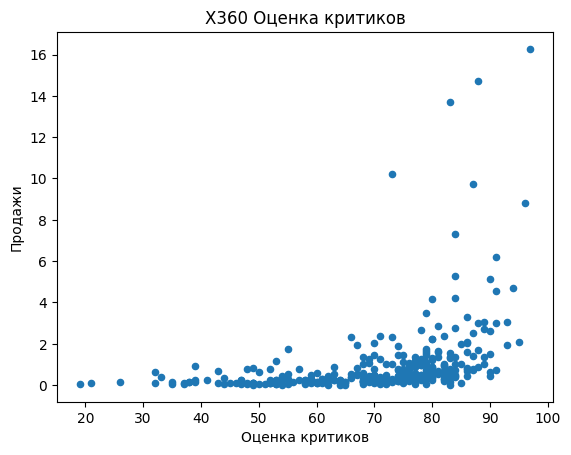

Корреляция оценок критиков и продаж


0.3912533245484555

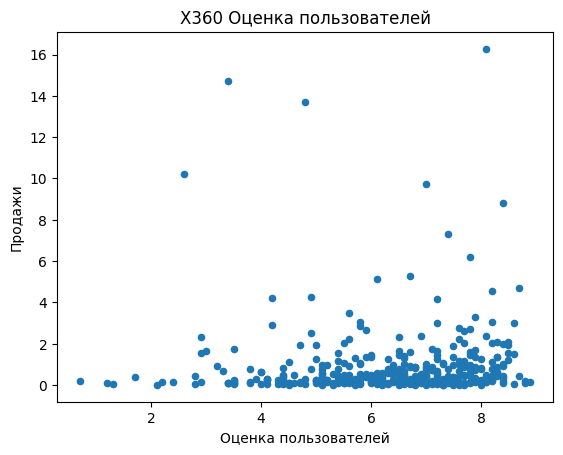

0.03891817072910262

Корреляция оценок пользователей и продаж


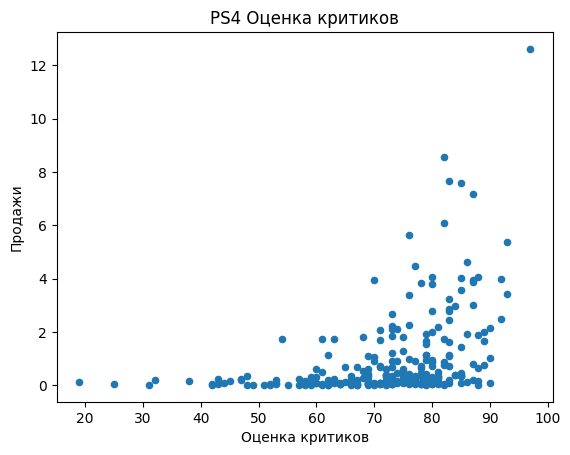

Корреляция оценок критиков и продаж


0.4065679020617816

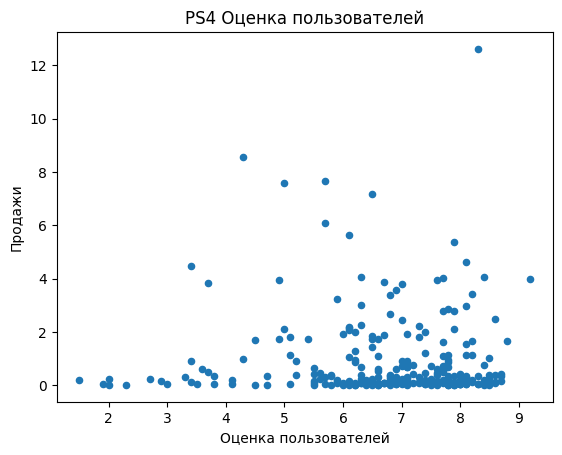

-0.03195711020455644

Корреляция оценок пользователей и продаж


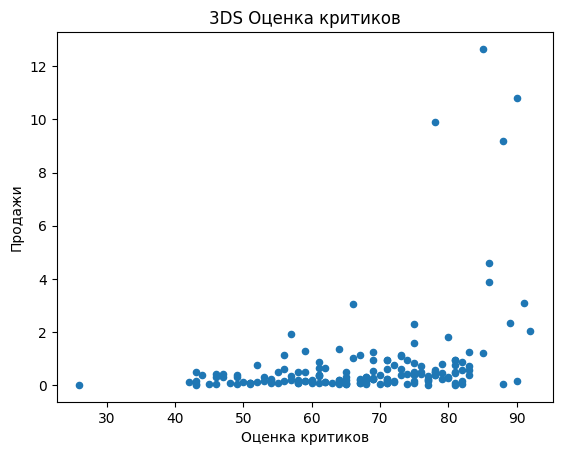

Корреляция оценок критиков и продаж


0.34873973059848346

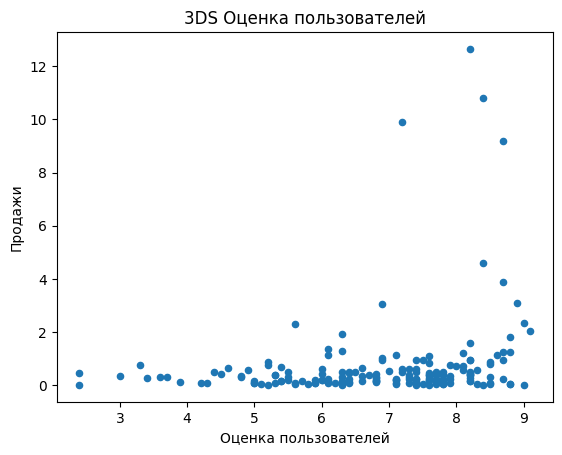

0.2220784364339088

Корреляция оценок пользователей и продаж


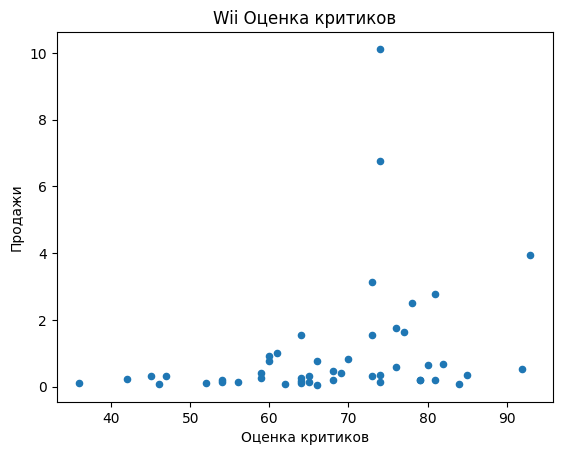

Корреляция оценок критиков и продаж


0.2922694954272934

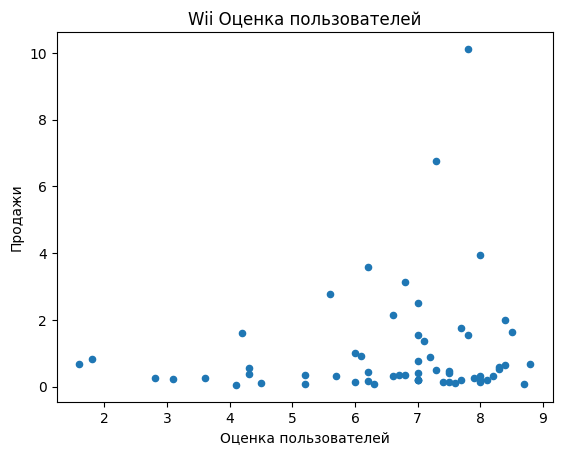

0.14550376734945006

Корреляция оценок пользователей и продаж


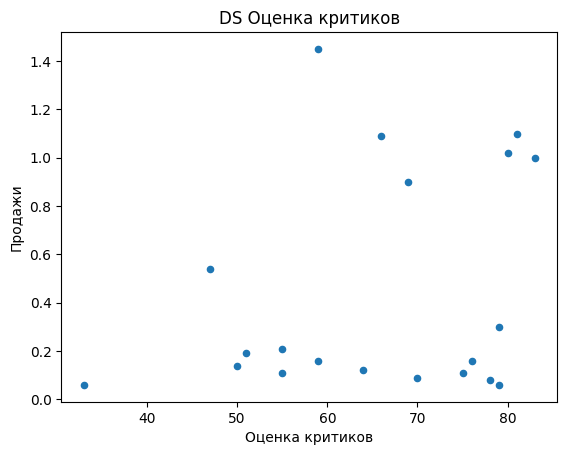

Корреляция оценок критиков и продаж


0.26116585975501416

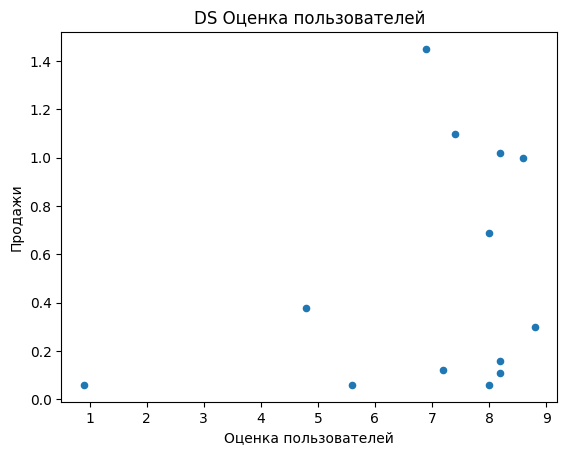

0.2810294019560495

Корреляция оценок пользователей и продаж


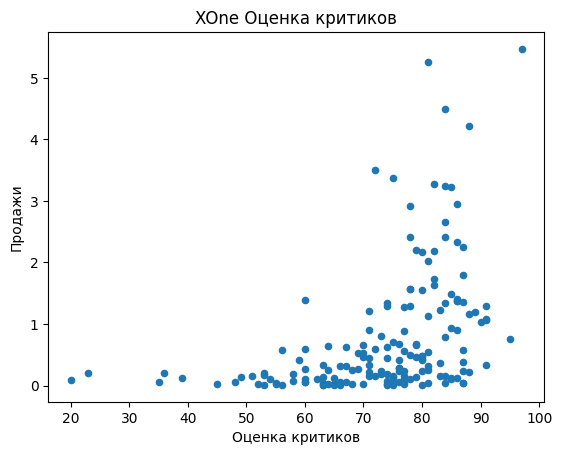

Корреляция оценок критиков и продаж


0.41699832800840164

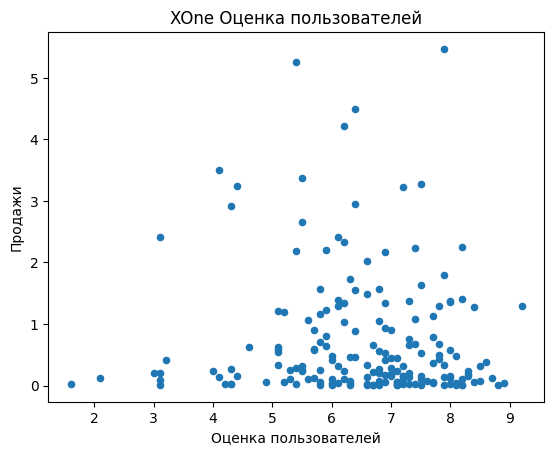

-0.06892505328279415

Корреляция оценок пользователей и продаж


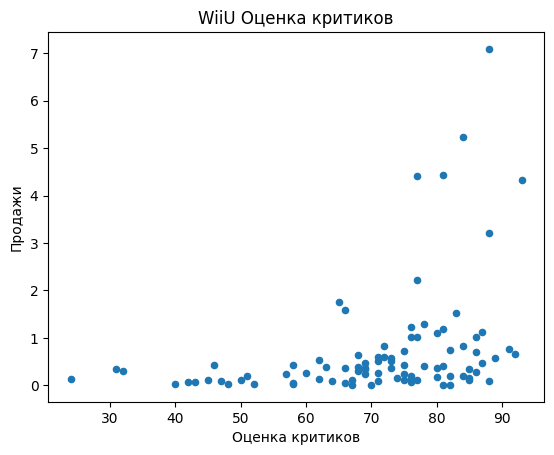

Корреляция оценок критиков и продаж


0.3483797601201749

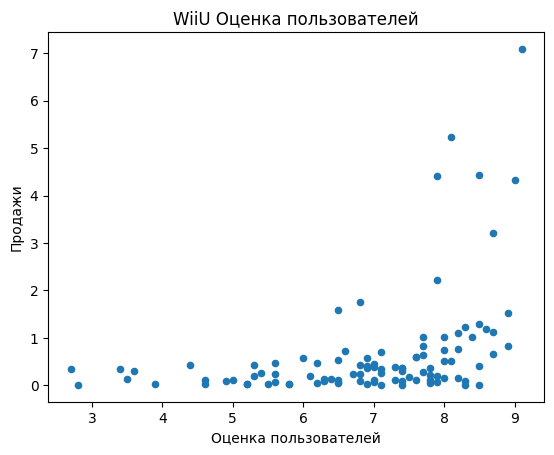

0.4002190202148617

Корреляция оценок пользователей и продаж


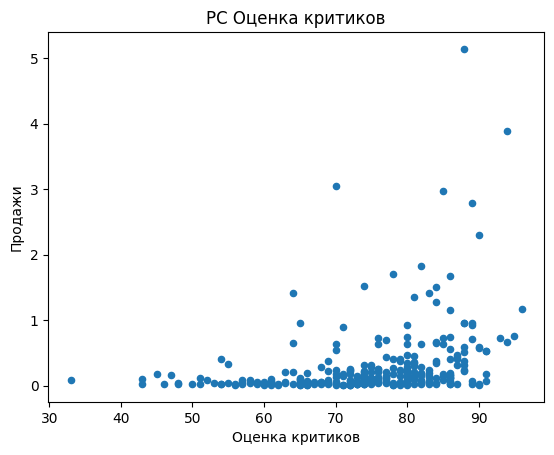

Корреляция оценок критиков и продаж


0.31418473969036326

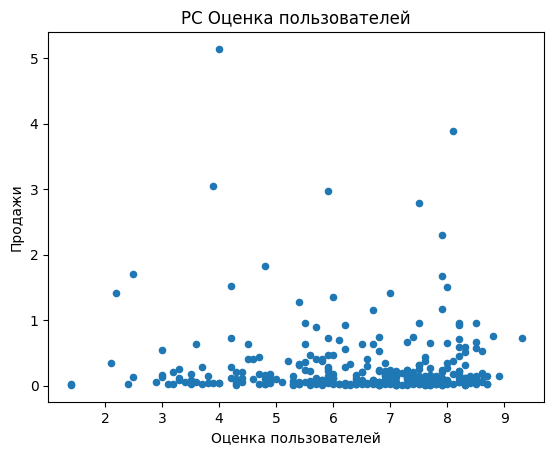

-0.04896683233511955

Корреляция оценок пользователей и продаж


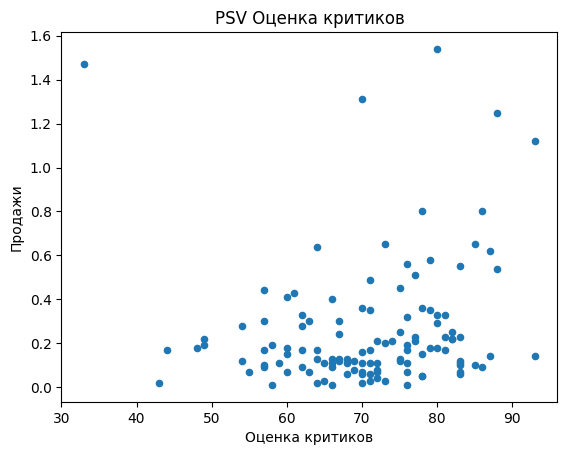

Корреляция оценок критиков и продаж


0.13176292727608935

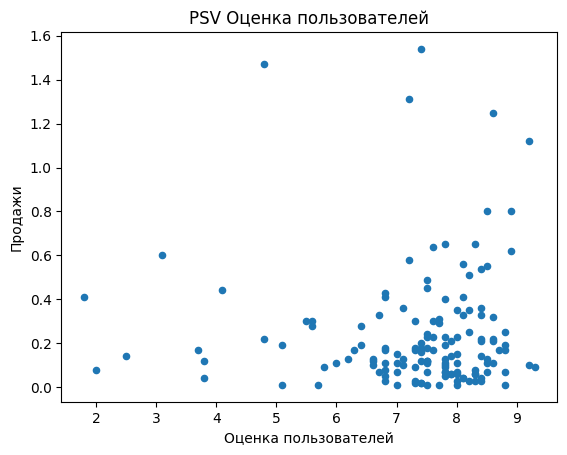

0.013488756835886498

Корреляция оценок пользователей и продаж


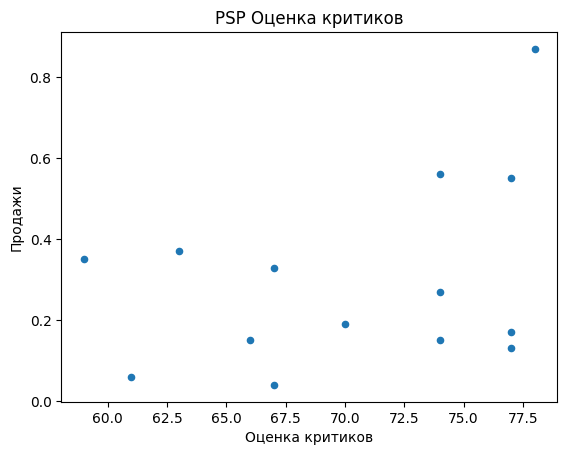

Корреляция оценок критиков и продаж


0.3581381002722692

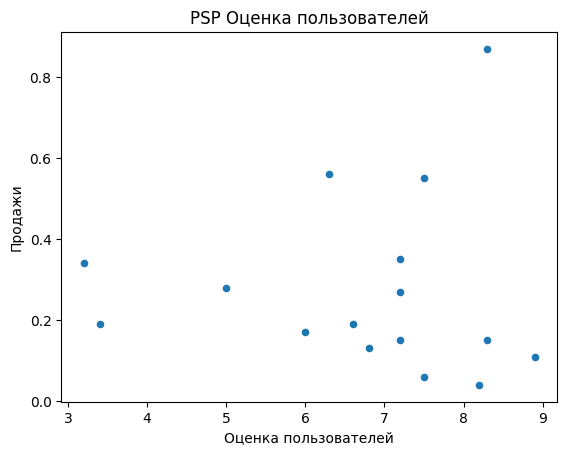

0.010035480754033762

Корреляция оценок пользователей и продаж


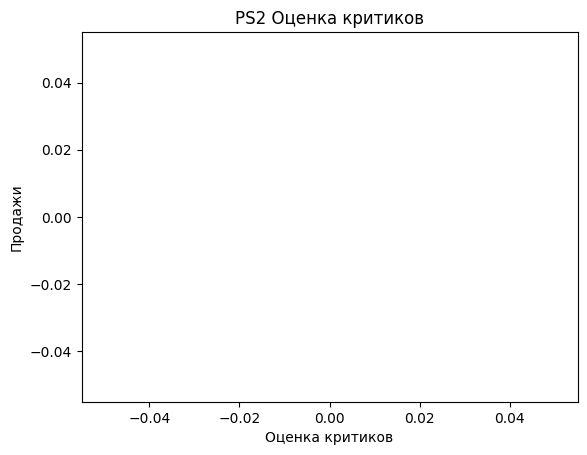

Корреляция оценок критиков и продаж


nan

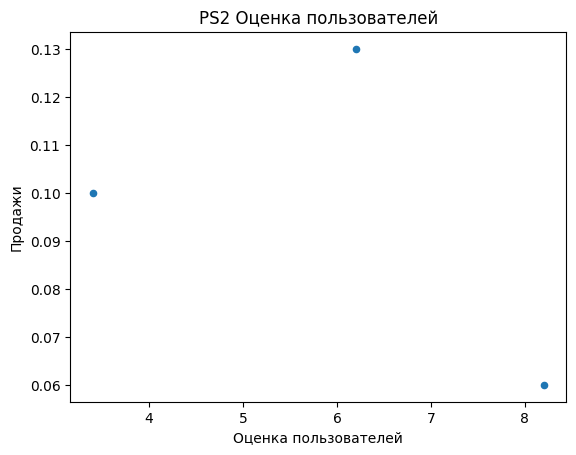

-0.48814358104490957

Корреляция оценок пользователей и продаж


In [38]:
for t in relevant_data['platform'].unique():
    relevant_data[relevant_data['platform'] == t].plot(y='sum_sales', x='critic_score', kind='scatter', title=t + ' Оценка критиков')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    plt.show()
    print('Корреляция оценок критиков и продаж')
    display(relevant_data[relevant_data['platform'] == t]['sum_sales'].corr(relevant_data[relevant_data['platform'] == t]['critic_score']))
    relevant_data[relevant_data['platform'] == t].plot(y='sum_sales', x='user_score', kind='scatter', title=t + ' Оценка пользователей')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.show()
    display(relevant_data[relevant_data['platform'] == t]['sum_sales'].corr(relevant_data[relevant_data['platform'] == t]['user_score']))
    print('Корреляция оценок пользователей и продаж')

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Здорово, что автоматизируешь процесс через цикл!)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>
    
Обрати внимание на платформу DS, значения корреляции следует подписать, указать где какое) Графики выше нужно подписать)

Влияние оценок на продажи на других платформах имеет похожий результат: графики и корреляция не показывают прямой взаимосвязи между оценкой пользователей и продажами (обычно корреляция составляет от -0.1 до 0.3, что говорит о слабой связи между величинами), а отзывы критиков имеют большее влияние (обычно примерно 0.4, что говорит о наличии некоторой зависимости).

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>

Оценки критиков находятся в указанном диапозоне, по некоторым платформам. О чем это будет говорить?

### Прибыльность жанров

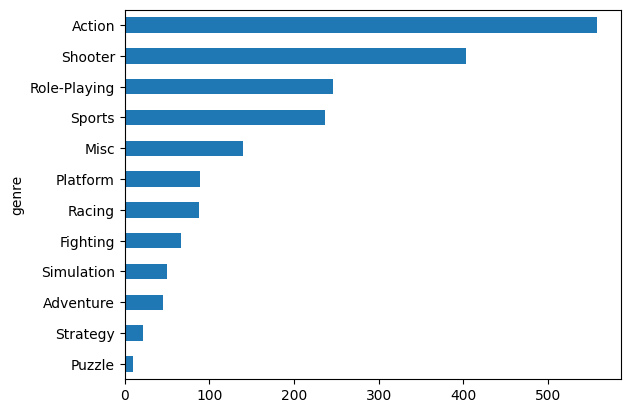

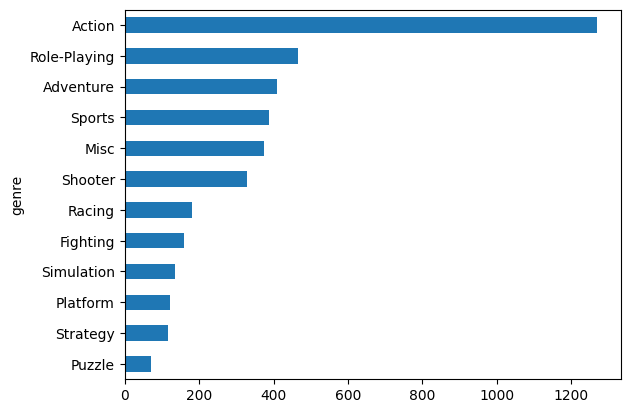

<AxesSubplot:ylabel='genre'>

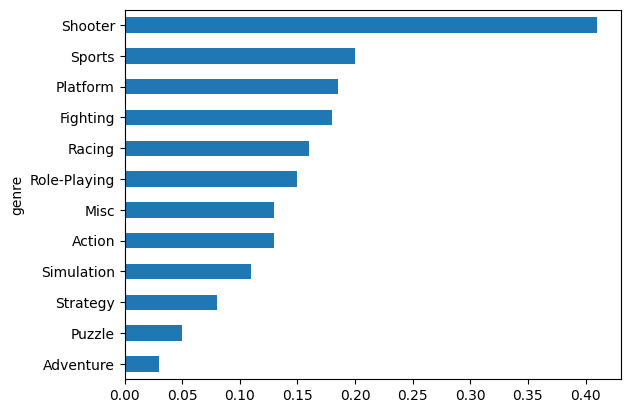

In [39]:
relevant_data.groupby('genre')['sum_sales'].agg('sum').sort_values().plot(kind='barh')
plt.show()
relevant_data.groupby('genre')['sum_sales'].agg('count').sort_values().plot(kind='barh')
plt.show()
relevant_data.groupby('genre')['sum_sales'].agg('median').sort_values().plot(kind='barh')

Самое большое количество игр выпущено в жанре action, этот же жанр имеет больше всего продаж, однако самая большая медиана продаж у жанра shooter.
Меньше всего выпущено игр жанра strategy. Самую меньшую сумму продаж имеет жанр platform (однако это скорее всего из-за небольшого количества выпущенных игр, медиана продаж этого жанра вторая по величине). Самую низкую медиану продаж имеет жанр adventure.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Верно, молодец, что анализируешь н только общие продвжи, но и медианные, а также кол-во игр. Только давай оформим график)

### Вывод по разделу 

* Платформы X360, Wii, PS3, DS, PSP и PC падают по продажам начиная с начала периода до 2016 года.
* В этом периоде себя хорошо показывают платформы: PSV, WiiU, XOne, PS4, 3DS 
* К концу периода у всех платформ наблюдается спад продаж (это обусловленно общим трендом на уменьшение суммы продаж в игровой индестрии, поэтому следует также исследовать медианные значения продаж по платформам)
* Смотря на медианные значения продаж по платформам стоит выделить WiiU, Wii, 3DS как более стабильные платформы, медианы прибыли которых не начали падать.
* PC, PSV, X360 также хорошо себя показывают на этом промежутке, однако их продажи уже начали падать.
* Отдельно стоит сказать про PS4 и XOne, на которые до исследования медиан хотелось сделать оставку, однако они показывают резкий спад в этом периоде и врядли будут прибыльны в следующем году.
* Диаграммы размаха показывают что обычно игры продаются тиражем до 0.8млн. штук значения более 1.75 млн редки и можно считать выбросами.
* Продажи не сильно зависят от отзывов пользователей, а от оценок критиков наблюдается небольшая зависимость (корреляция примерно 0.4)
* Если медиану продаж считать основной метрикой прибыльности, то самым прибыльным является жанр shooter, а самым не прибыльным adventure.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Отлично, что есть промежуточный вывод по разделу, не забудь обновить в соответсвии с работой)

## Портрет пользователя для каждого региона

### Топ-5 платформ по регионам

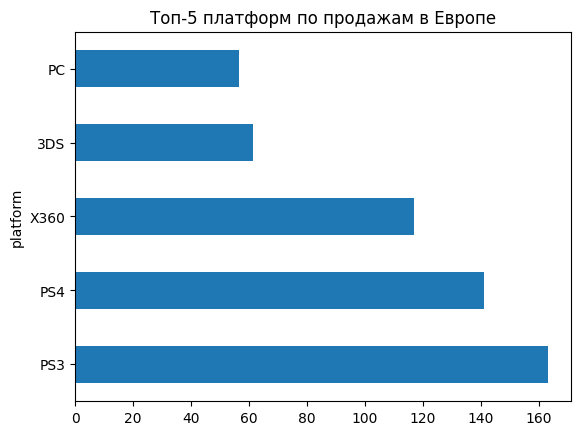

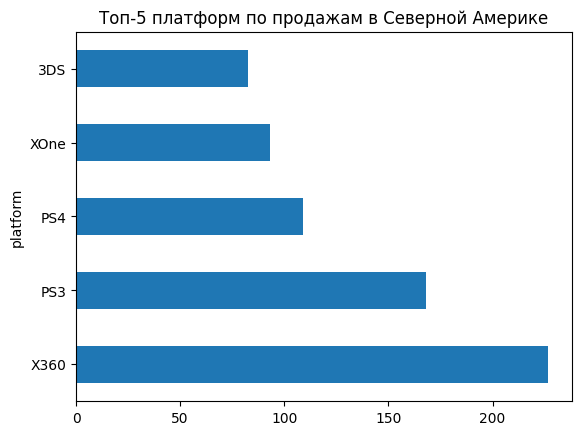

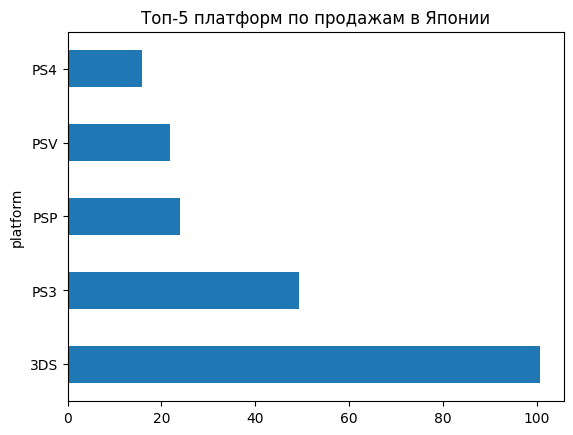

In [40]:
relevant_data.groupby('platform')['eu_sales'].agg('sum').sort_values(ascending=False)[:5].plot(kind='barh', title='Топ-5 платформ по продажам в Европе')
plt.show()
relevant_data.groupby('platform')['na_sales'].agg('sum').sort_values(ascending=False)[:5].plot(kind='barh', title='Топ-5 платформ по продажам в Северной Америке')
plt.show()
relevant_data.groupby('platform')['jp_sales'].agg('sum').sort_values(ascending=False)[:5].plot(kind='barh', title='Топ-5 платформ по продажам в Японии')
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Как вариант улучшения, можно построить 3 графика рядом, для этого используют subplots. Так мы сможем рассмотреть ранок каждого региона отдельно или все регионы по каждой категории. 
    
Добавлю ссылку на доп. информацию, для изучения: 
    
https://devpractice.ru/matplotlib-lesson-2-work-with-pyplot/
    
https://pyprog.pro/mpl/mpl_main_components.html

* Самые популярные платформы в:
    1. Японии - 3DS 
    2. Европе - PS3
    3. Северной Америке - Xbox-360

### Топ-5 жанров по регионам

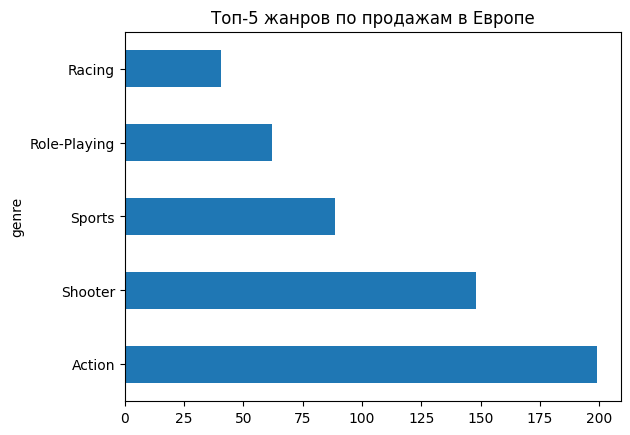

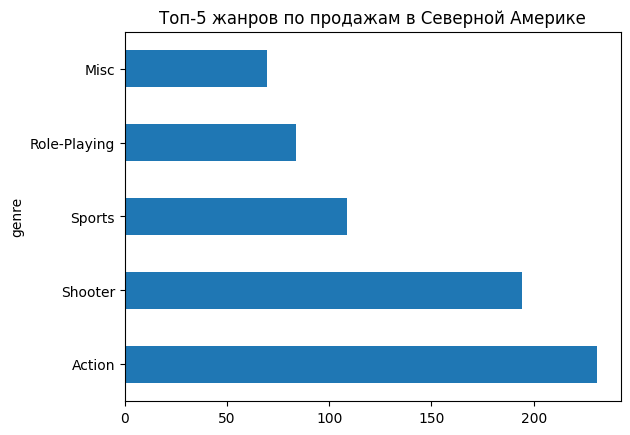

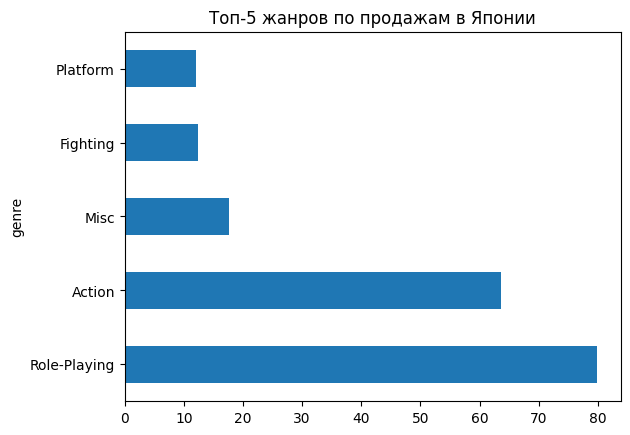

In [41]:
relevant_data.groupby('genre')['eu_sales'].agg('sum').sort_values(ascending=False)[:5].plot(kind='barh', title='Топ-5 жанров по продажам в Европе')
plt.show()
relevant_data.groupby('genre')['na_sales'].agg('sum').sort_values(ascending=False)[:5].plot(kind='barh', title='Топ-5 жанров по продажам в Северной Америке')
plt.show()
relevant_data.groupby('genre')['jp_sales'].agg('sum').sort_values(ascending=False)[:5].plot(kind='barh', title='Топ-5 жанров по продажам в Японии')
plt.show()

Вкусы пользователей из Северной Америки и Европы сильно совпадают в обоих регионах в топ-5 вошли action, sports, shooter и role_playing причем на одинаковых местах. action, role-playing также популярны и в Японии, но в этом регионе самым популярным жанром Role-Playing.

### Влияние рейтинга ESRB на продажи в отдельном регионе

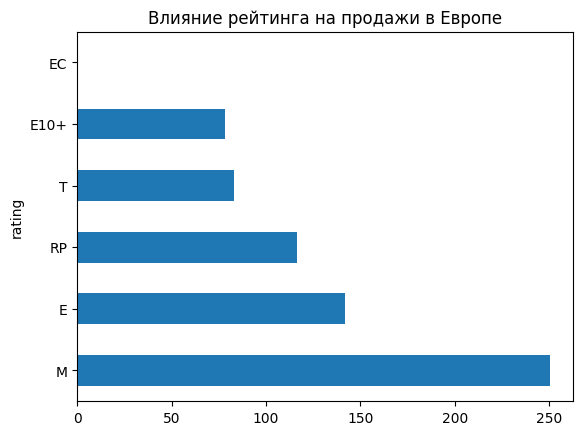

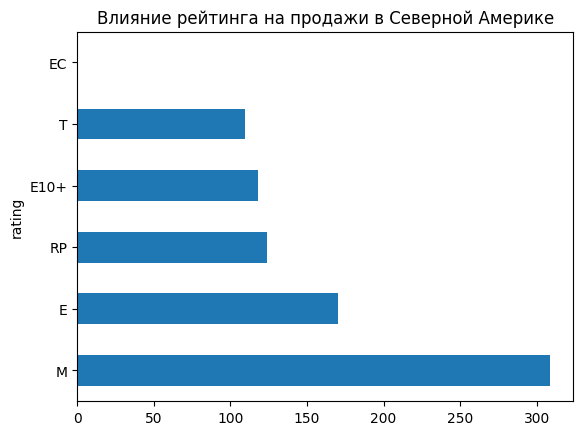

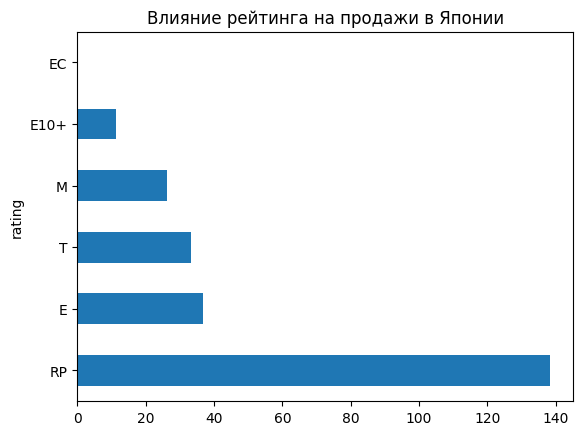

In [42]:
relevant_data.groupby('rating')['eu_sales'].agg('sum').sort_values(ascending=False).plot(kind='barh', title='Влияние рейтинга на продажи в Европе')
plt.show()
relevant_data.groupby('rating')['na_sales'].agg('sum').sort_values(ascending=False).plot(kind='barh', title='Влияние рейтинга на продажи в Северной Америке')
plt.show()
relevant_data.groupby('rating')['jp_sales'].agg('sum').sort_values(ascending=False).plot(kind='barh', title='Влияние рейтинга на продажи в Японии')
plt.show()

* Рейтинг слабо отличается от региона к региону (напомню, что RP это синтетическая заглушка, которая не обозначает возрастной рейтинг). 
* Графики во всех доступных регионах очень похожи. Порядок популярности игры по рейтингу в порядке убывания: E, T, M E10+ (кроме европы: E, M, T E10+), остальные значения практически не пользуются спросом.
* Стоит также отметить что в Японии большая часть игр с неопределенным рейтингом, что не позволяет с уверенностью распределить влияние рейтинга на продажи. В остальных регионах ситуация лучше, но неопределенный рейтинг также имеет большой вес.

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
        
Пропуски в колонке `rating` я бы посоветовала заменить на `undefined`. Это важно потому, что на более поздних этапах анализа (когда будет анализировать рейтинг по регионам) важно включить в анализ игры без рейтинга и сравнить их с теми играми, у которых рейтинг есть. Также можно оптимизировать обозначения в рейтинге, возможно неиспользующиес следует заменить на схожие по значению)

### Вывод по разделу

* Платформы в разных регионах имеют разную популярность. В Европе самая популярная PS3, в Северной Америке - Xbox360 и в Японии - 3DS.
* Популярность жанров мало отличается между регионами. Самыми популярными являются action, sports, shooter и role-playing (В Японии самым популярным жанром в отлиции от остальных регионов является role-playing).
* Рейтинг слабо отличается от региона к региону. Порядок популярности игры по рейтингу в порядке убывания примерно следующий: E, T, M E10+.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>

Так как мы взяли слишком большой актуальный период, прогнозы по регионам не будут актуальными. Так как сейчас в рекомендациях уже устаревше платформы. Нужно будет обновить)

## Проверка гипотез

### Средние полльзовательские рейтинги платформ Xbox One и PC одинаковые.

* Нулевая гипотеза: Средние пользовательские рейтинги Xbox One равны пользовательским рейтингам PC.
* Альтернативная гипотеза: Средние пользовательские рейтинги Xbox One и PC не равны.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Гипотезы составлены верно)

In [43]:
alpha = .05

results = st.ttest_ind(relevant_data[(relevant_data['platform'] == 'XOne') & ~(relevant_data['user_score'].isna())]['user_score'], 
                       relevant_data[(relevant_data['platform'] == 'PC') & ~(relevant_data['user_score'].isna())]['user_score'])

display(results.pvalue)
display(results.pvalue < alpha)

0.6267602271422398

False

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>

Статистические тесты необходимо провести на актуальных данных.

Мы не можем устерждать, что средние пользовательские рейтинги пользователей Xbox One и PC не равны.

### Средние пользовательские рейтинги жанров Action и Sports разные.

* Нулевая гипотеза: Средние пользовательские рейтинги жанров action и sports равны
* Альтернативная гипотеза: Средние пользовательские рейтинги жанров action и sports не равны.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Правильно)

In [44]:
alpha = .05

results = st.ttest_ind(relevant_data[(relevant_data['genre'] == 'Action') & ~(relevant_data['user_score'].isna())]['user_score'], 
                       relevant_data[(relevant_data['genre'] == 'Sports') & ~(relevant_data['user_score'].isna())]['user_score'])

display(results.pvalue)
display(results.pvalue < alpha)

6.700647490667088e-24

True

Мы можем с вероятностью больше 99% сказать, что средние пользовательские рейтинги жанров action и sports не равны.

### Вывод по разделу

* Мы не можем устерждать, что средние пользовательские рейтинги пользователей Xbox One и PC не равны.
* Мы можем с вероятностью больше 99% сказать, что средние пользовательские рейтинги жанров action и sports не равны.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>

Нужно будет обновить вывод)

## Общий вывод

### Предобработка данных:

* Типы в колонках year_of_release и user_score были изменены. 
* значения tbd в колонке user_store изменены на NaN
* В колонках user_score и year_of_release были изменены на float и int.
* В колонке rating пропуски были заполнены значением-заглушкой RP.
* В колонках genre, name пропуски удалены, в остальных колонках было решено пропуски оставить как есть.
* Найдены и обработаны дубликаты
* Добавлена колонка с суммой продаж по всем регионам.

### Исследовательский анализ:

* Подавляющее большенство игр было выпущено после 2001 года.
* Данные показали, что характерный срок появляются новые и исчезают старые платформы - примерно 10 лет.
* Самые популярные за все время платформы: PS2, X360, Wii, PS3, DS, PS, GBA, PS4, PSP, XB. 
* Платформы X360, Wii, PS3, DS, PSP и PC падают по продажам начиная с 2011 до 2016 года.
* с 2011 по 2016 у всех платформ наблюдается спад продаж (это обусловленно общим трендом на уменьшение суммы продаж в игровой индестрии, поэтому следует также исследовать медианные значения продаж по платформам)
* Потенциально прибыльные в 2017 году платформы: PSV, WiiU, XOne, PS4, 3DS.
* Смотря на медианные значения продаж по платформам стоит выделить WiiU, Wii, 3DS как более стабильные платформы, медианы прибыли которых не начали падать.
* Диаграммы размаха показывают что обычно игры продаются тиражем до 0.8млн. штук значения более 1.75 млн редки и можно считать выбросами.
* Продажи не сильно зависят от отзывов пользователей, а от оценок критиков наблюдается небольшая зависимость (корреляция примерно 0.4)
* Если медиану продаж считать основной метрикой прибыльности, то самым прибыльным является жанр shooter, а самым не прибыльным adventure.

### Портрет пользователя по регионам

* Продажи не сильно зависят от отзывов пользователей, оценка критиков зачастую коррелирует с количеством продаж (корреляция обычно составляет примерно 0.4, что говорит о некоторой зависимости).
* Если медиану продаж считать основной метрикой прибыльности, то самым прибыльным является жанр shooter, а самым не прибыльным adventure.
* Порядок популярности игры по рейтингу в порядке убывания примерно следующий: E, T, M E10+.

### Проверка гипотез

* Мы не можем устерждать, что средние пользовательские рейтинги пользователей Xbox One и PC не равны.
* Мы можем с вероятностью больше 99% сказать, что средние пользовательские рейтинги жанров action и sports не равны.

### Рекомендации

* Основные критерии на которые следует обратить внимание:
    * самые популярные значения в возрастном рейтинге: E, T, M E10+, на остальные следует делать с тавку с большой опаской.
    * вкусы пользователей из Северной Америки и Европы сильно совпадают в обоих регионах в топ-5 вошли action, sports, shooter и role-playing причем на одинаковых местах. action, sports и misc Также популярны и в Японии, но в этом регионе самым популярным жанром с оказался Role-Playing.
    * платформы, которые по прогнозам будут прибыльны в следующем году:PSV, WiiU, XOne, PS4, 3DS. (Возможно следует делать ставку именно за игры под эти платформы)
    * следует учитывать, что отзывы критиков могут оказать влияние на популярность игры
    * также стоит отметить, что жанр с самой большой медианой по продажам это shooter.
    * оценку распределения по возрастному рейтингу можно сделать более точной добавив в исходные данные недостающие значения.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
  Содержательный вывод по проделанной работе, молодец!) Но нужно будет его обновить)

<div style="border:solid Purple 2px; padding: 40px">

<h2> Общий комментарий ревьюера 😊<a class="tocSkip"> </h2>
    <br/>
Ты проделал отличную работу, основные задачи выполнены. Не могу не выделить аккуратность работы в целом и  работу с циклами!  Однако, есть несколько важных моментов, которые стоит улучшить, чтобы проект стал действительно идеальным!

Необходимо доработать:
    
* Переопределить временные границы
* Корреляционный анализ
* Актуализировать результаты и выводы
* Остальные комментарии ты найдешь в работе

**Желаю удачи и жду твой проект на повторное ревью! Если у тебя вдруг есть какие–либо вопросы, то я с радостью отвечу на них 😊**
    
Также оставлю дополнительный материал по визуализации, если будет интересно:
    

* книга Александра Богачева [Графики, которые убеждают всех](https://book24.ru/product/grafiki-kotorye-ubezhdayut-vsekh-5873820/)
* [cheatsheet по визуализации](https://extremepresentation.typepad.com/.a/6a00d8341bfd2e53ef0111683a7591970c-pi)
* бесплатный курс от Яндекс.Практикум [Визуальныe презентации](https://practicum.yandex.ru/visual-presentation/)
* Формат таблиц в pandas с помощью style. В том числе цветовое выделение. (https://habr.com/ru/post/521894/)
* Основные компоненты matplotlib (https://pyprog.pro/mpl/mpl_main_components.html)
* 50 оттенков matplotlib — The Master Plots (с полным кодом на Python) (https://habr.com/ru/post/468295/)
* Построение графиков с использованием двух осей. (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)
* Сайт, подробно представлюящий практически все типы визуализаций. (https://datavizproject.com/)
* Шпаргалка по визуализации данных в Python с помощью Plotly (https://habr.com/ru/post/502958/)
</div> 